# Sign and Direction Conventions

This notebook will make explicit the sign and direction (orientation) conventions of prysm.  Sign conventions is only relevant to the conversion of optical phases to wavefunctions, while direction is relevant to propagation and general understanding of "where" data is in an array.

Some setup is done first, which may be ignored

In [1]:
import numpy as np

from prysm.coordinates import make_xy_grid, cart_to_polar
from prysm.geometry import circle
from prysm.polynomials import hopkins
from prysm.propagation import Wavefront

from matplotlib import pyplot as plt

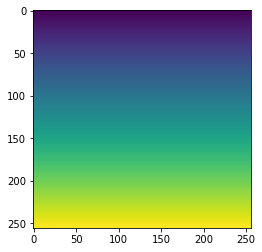

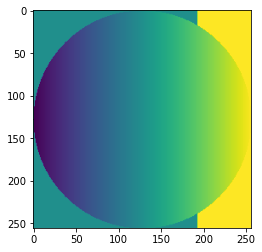

In [21]:
x, y = make_xy_grid(256, diameter=2)
r, t = cart_to_polar(x, y)
dx = x[0,1]-x[0,0]

# t += (np.pi/2)
# W111, at r,t,H=1
tiltx = hopkins(1, 1, 1, r, t, 1)
tilty = hopkins(1, 1, 1, r, t, 1)
plt.imshow(tilty)

support = circle(1, r)

wfx = Wavefront.from_amp_and_phase(support, tiltx*315, .633, dx)
wfy = Wavefront.from_amp_and_phase(support, tilty*315, .633, dx)
phs = wfx.phase
plt.figure()
plt.imshow(phs.data)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

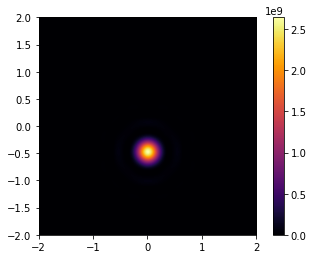

In [24]:
psf = wfy.focus(1, Q=2).intensity
psf.plot2d(xlim=2)

In [ ]:
wf.intensity.plot2d()

In [ ]:
plt.imshow(support)